In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/multi_logit.csv')
data.columns = ['label', 'x1', 'x2']

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


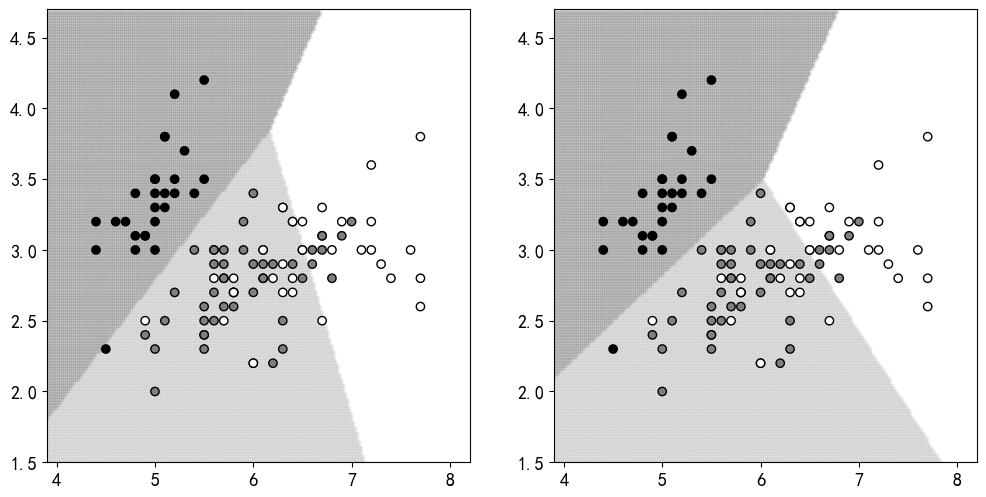

In [3]:
# 使用逻辑回归对多元分类问题建模，并可视化结果
features = ['x1', 'x2']
labels = 'label'
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框
fig = plt.figure(figsize=(12, 6), dpi=100)
methods = ['multinomial', 'ovr']
# 使用两种不同的方法对数据建模
for i in range(len(methods)):
    model = LogisticRegression(multi_class=methods[i], solver='sag',
                               max_iter=1000, random_state=42)
    model.fit(data[features], data[labels])
    x1_min, x2_min = np.min(data[features], axis=0) - 0.5
    x1_max, x2_max = np.max(data[features], axis=0) + 0.5
    # 生成Cartesian积
    area = np.dstack(
        np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))).reshape(-1, 2)
    pic = model.predict(area)
    ax = fig.add_subplot(1, 2, i+1)
    colors = np.array(['black', 'gray', 'white'])
    ax.scatter(area[:, 0], area[:, 1], c=colors[pic], alpha=0.1, s=4, edgecolors=colors[pic])
    ax.scatter(data['x1'], data['x2'], c=colors[data[labels]], edgecolors='k')
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
plt.savefig('multi_logit.png', dpi=200)
plt.show()